In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('spam.csv',encoding='latin-1')

## Data Cleaning

In [3]:
#pd.set_option('display.max_rows', None)
raw_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
raw_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)     #dropping insignificant columns

In [5]:
raw_data.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
raw_data.head()

,message_type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#checkpoint 1
data_encode=raw_data.copy()

In [7]:
#changing categorical variables in 'message_type' to numerical
from sklearn.preprocessing import LabelEncoder
label_encode =LabelEncoder()
data_encode['message_type']=label_encode.fit_transform(data_encode['message_type'])
data_encode.head()

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#get the dataframe containing spams only
data_encode[data_encode['message_type']==1].head()  #ham is 0 , spam is 1

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [9]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_type  5572 non-null   int64 
 1   message       5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
#checking null/missing values
data_encode.isnull().sum()

message_type    0
message         0
dtype: int64

In [11]:
#no null value found

In [12]:
#checking for duplicates
data_encode.duplicated().sum()

403

In [13]:
#403 duplicates found
#let's drop duplicates
df= data_encode.drop_duplicates()    #checkpoint2

## EDA (Exploratory Data Analysis)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   message_type  5169 non-null   int64 
 1   message       5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [15]:
#resetting index
df.reset_index(drop=True,inplace=True)
df.index

RangeIndex(start=0, stop=5169, step=1)

In [16]:
df.describe(include='all')

,message_type,message
count,5169.000000,5169
unique,NaN,5169
top,NaN,"Go until jurong point, crazy.. Available only ..."
freq,NaN,1
mean,0.126330,NaN
std,0.332253,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


In [17]:
df['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

###### we found that there are 4516 ham(non-spam) and 653 spam messages

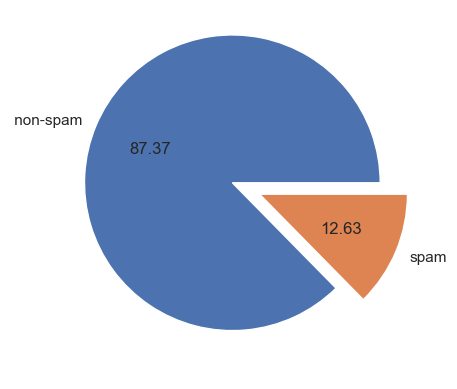

In [18]:
#visualising data's distribution
plt.pie(df['message_type'].value_counts(),labels=[' non-spam','spam'],autopct='%0.2f',explode=[0.2,0])
plt.show()

In [19]:
count=df['message_type'].value_counts()

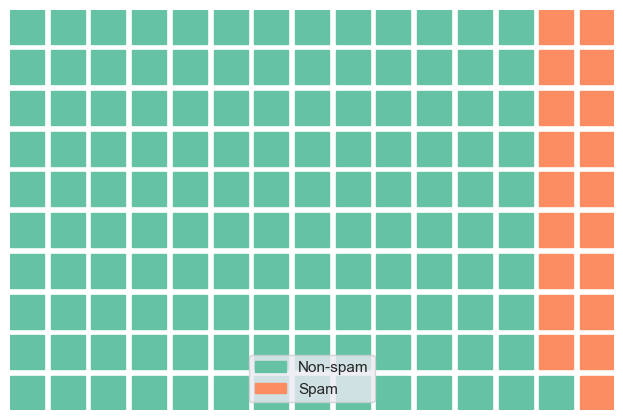

In [20]:
from pywaffle import Waffle
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 10,
    columns=15,
    values = [count[0],count[1]], 
    labels=['Non-spam','Spam']
) 

In [21]:
#NLP tool kit
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 54] Connection
[nltk_data]     reset by peer>


False

In [22]:
pd.options.mode.chained_assignment = None #to disable this new warning

In [23]:
df['No._of_characters']=df['message'].apply(len)  #compute no. of characters of each item present in 'message' column
df.head()

,message_type,message,No._of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#compute no. of words of each item present in 'message' column
df['No._of_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,message_type,message,No._of_characters,No._of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#compute no. of sesntences of each item present in 'message' column
df['No._of_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,message_type,message,No._of_characters,No._of_words,No._of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,message_type,No._of_characters,No._of_words,No._of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
#stats for ham messages
df[df['message_type']==0].describe()

,message_type,No._of_characters,No._of_words,No._of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [28]:
#stats for spam messages
df[df['message_type']==1].describe()

,message_type,No._of_characters,No._of_words,No._of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


#### From above statistics, we analyse that spam are longer than ham (mean,min and max values of spam are significantly greater than ham)

<Axes: xlabel='No._of_characters', ylabel='Count'>

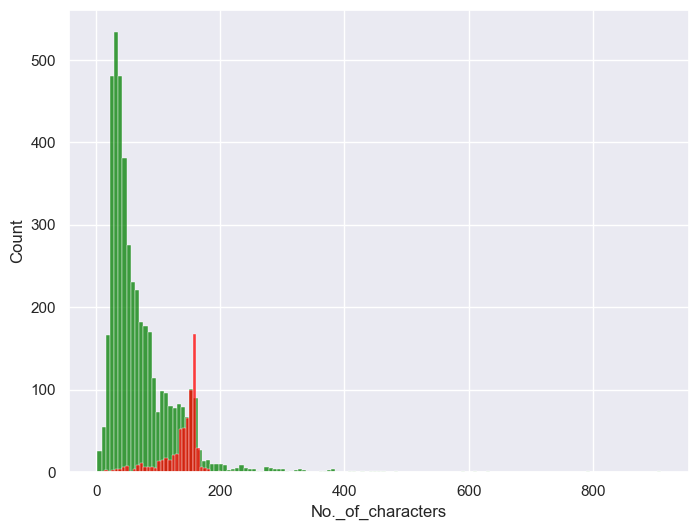

In [29]:
#comparing no. of characters in ham and spam
plt.figure(figsize=(8,6))
sns.histplot(df[df['message_type']==0]['No._of_characters'],color='green')
sns.histplot(df[df['message_type']==1]['No._of_characters'],color = 'red')

In [30]:
#from above visualization we can analyse how more no. of characeters are in spam messages, though ham have larger
#no. of characters but their frequency is very less

<Axes: xlabel='No._of_words', ylabel='Count'>

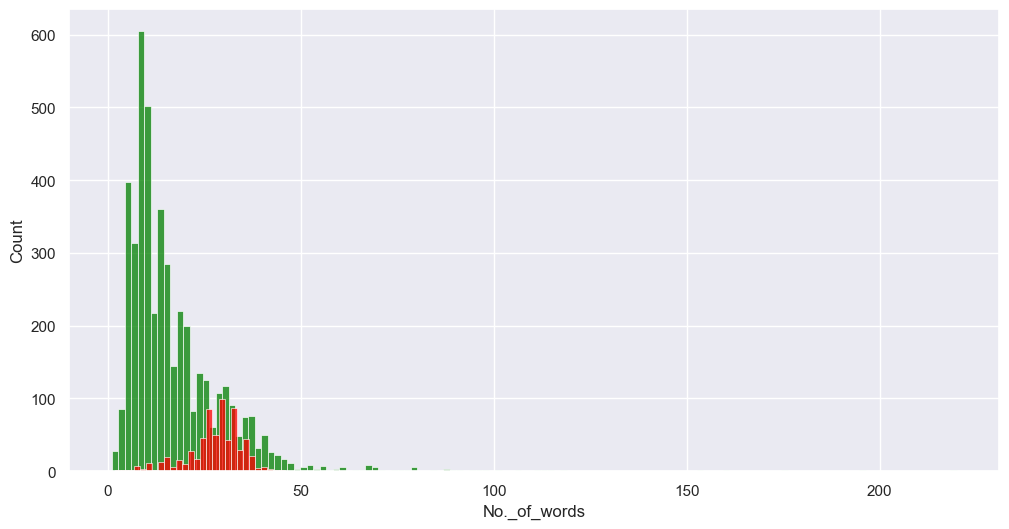

In [62]:
#comparing no. of words in ham and spam
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['No._of_words'],color='green')
sns.histplot(df[df['message_type']==1]['No._of_words'],color='red')

<Axes: >

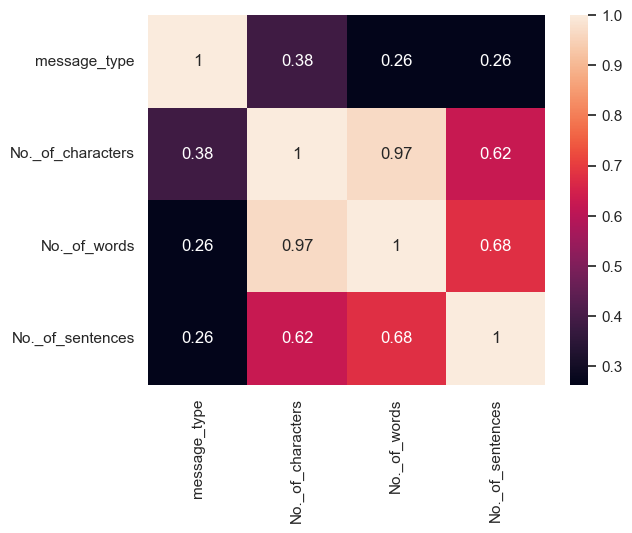

In [32]:
#plotting a heatmap for the correlation
sns.heatmap(df.drop(['message'],axis=1).corr(),annot=True)

In [33]:
#As we see multicollinearity here, we cannot use all three columns instead we shall use only one and that 
#should be No._of_characters as it has highest correlation with message_type.

## Data Preprocessing 

In [34]:
#transforming 'message' column

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string

from nltk.stem.porter import PorterStemmer  #for stemming
# Instantiate the Porter Stemmer
ps = PorterStemmer()

def msg_transform(message):
    # Convert the input message to lowercase
    message = message.lower()

    # Tokenize the lowercase message using NLTK
    message_tokens = nltk.word_tokenize(message)

    # Initialize an empty list to store stemmed tokens
    stemmed_tokens = [] 

    # Iterate over each token in the tokenized message
    for token in message_tokens:
        # Check if the token contains onlu alphanumeric char and token is not a stopword and not a punctuation
        if token.isalnum() and token not in stopwords.words('english') and token not in string.punctuation:
            # Perform stemming on the token and append the result to the list
            stemmed_tokens.append(ps.stem(token))

    # Join the stemmed tokens into a space-separated string
    transformed_msg = " ".join(stemmed_tokens)

    # Return the transformed message
    return transformed_msg

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afshanfatima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df['Transformed_msg']=df['message'].apply(msg_transform)

In [37]:
df.head()

,message_type,message,No._of_characters,No._of_words,No._of_sentences,Transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
#now we'll use wordcloud to get the most frequently used words

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
#for spam messages
wc_spam=wc.generate(df[df['message_type']==1]['Transformed_msg'].str.cat(sep=""))

#.str.cat(sep="") concatenates all the columns of transformed messages into a single string

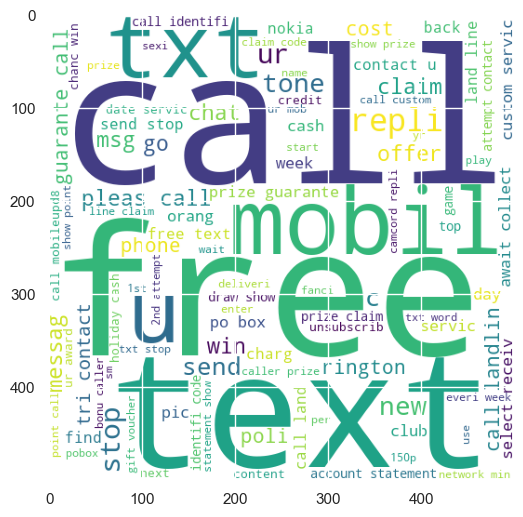

In [41]:
plt.figure(figsize=(6,8))
plt.imshow(wc_spam)

In [42]:
#for ham messages
wc_ham=wc.generate(df[df['message_type']==0]['Transformed_msg'].str.cat(sep=""))

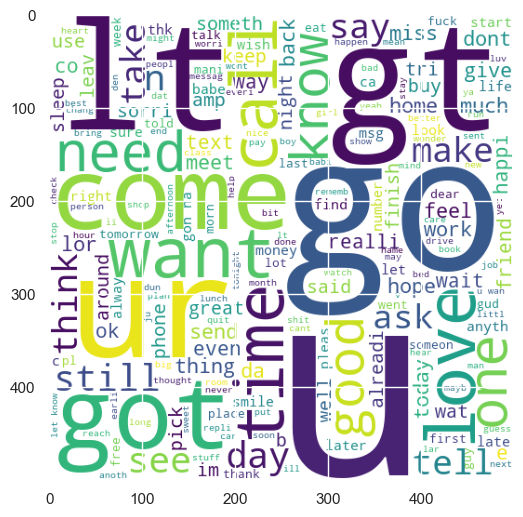

In [43]:
plt.figure(figsize=(6,8))
plt.imshow(wc_ham)

In [44]:
spam_top_words=[]
for msg in df[df['message_type']==1]['Transformed_msg'].tolist():
    for word in msg.split():
        spam_top_words.append(word)
        
from collections import Counter
word_counts =Counter(spam_top_words)  #Use the Counter class to count the occurrences of each word in the spam_top_words
word_counts

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [45]:
# Get the most common 30 words and create a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])
common_words_df.head()

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


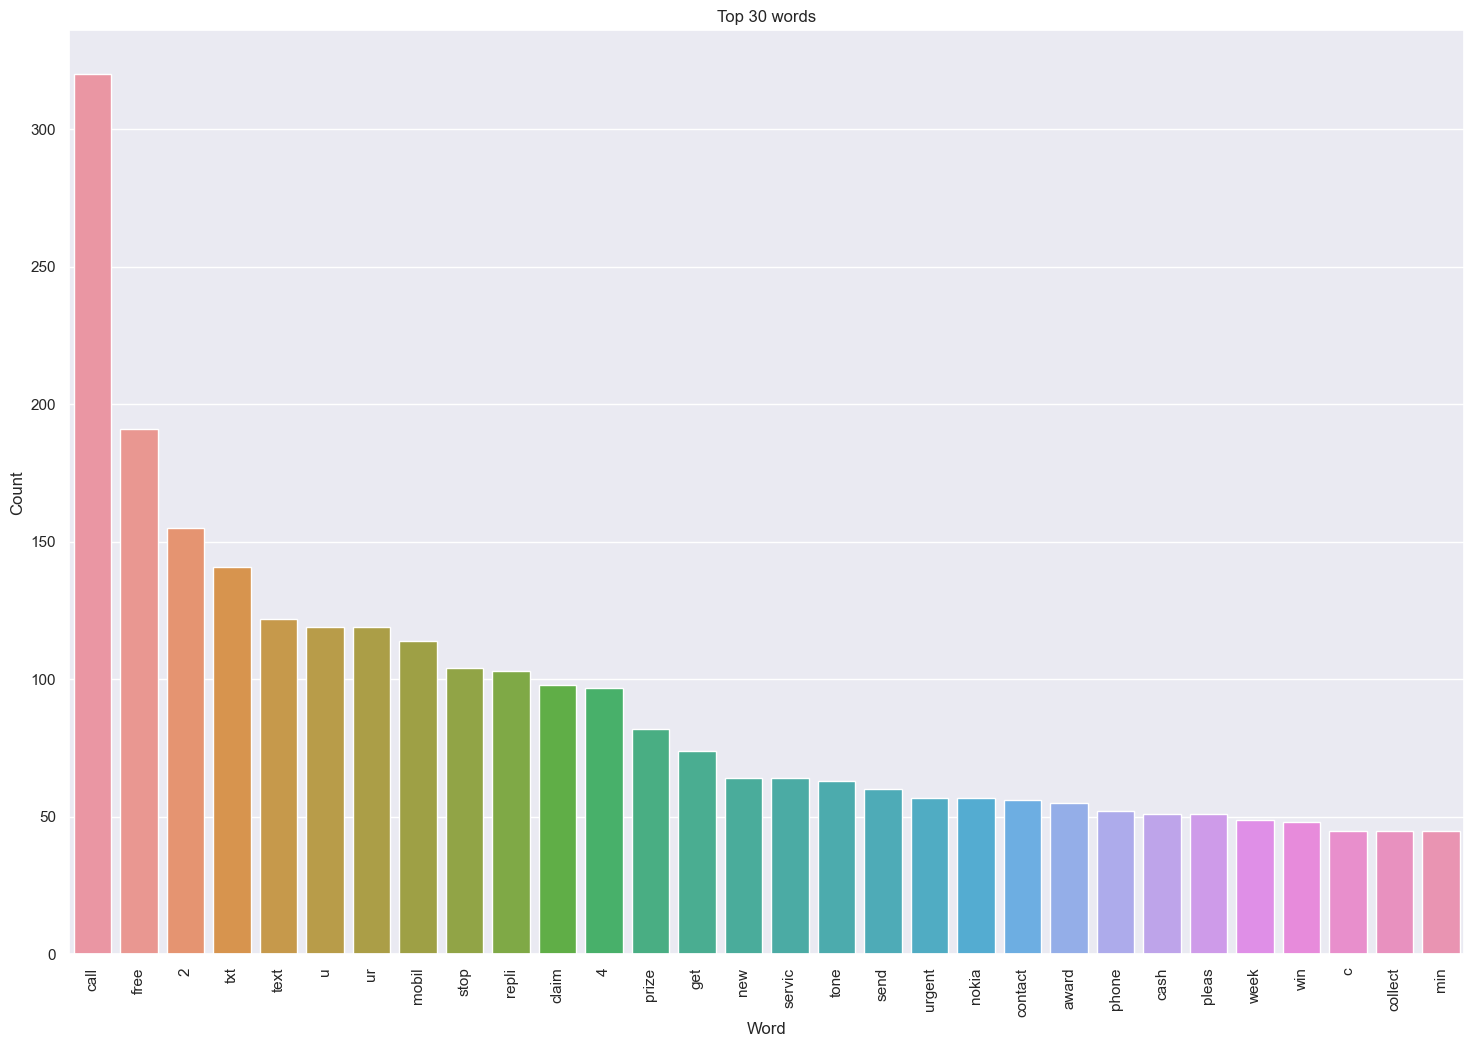

In [64]:
plt.figure(figsize=(18, 12))
sns.barplot(x='Word', y='Count', data=common_words_df).set(title="Top 30 words")
plt.xticks(rotation='vertical')
plt.show()

## Building Model

In [48]:
#we have categorical input and Output is Numerical.
#But as we know in the Naive Bayes algorithm the input columns should be numerical so we have to convert (VECTORIZE)
#the column.

In [49]:
#we use TFIDF to vectorize the column

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [51]:
x=tfidf.fit_transform(df['Transformed_msg']).toarray()  #.toarray() to get x in matrix form
y=df['message_type'].values

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [54]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [55]:
#now let's find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:

In [56]:
#for gnb
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8694390715667312
Confusion Matrix of Guassian NB is:  [[788 108]
 [ 27 111]]
Precision score of the Gaussian NB is 0.5068493150684932


In [57]:
#mnb
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9709864603481625
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 30 108]]
Precision score of the Multinomial NB is 1.0


In [58]:
#with Multionomial NB, the precision comes out to be 1 which proves very good for our model as it means 
#there will be no “FALSE POSITIVES”

In [59]:
#bnb
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9835589941972921
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 16 122]]
Precision score of the Bernoulli NB is 0.991869918699187


In [60]:
#Hence we use the Model with MNB(Multinomial Naive Bayes) as it was having the highest precision score 
#(i.e least False Positives)and TFIDF Vectorization.

In [66]:
# to see all predictions
#np.set_printoptions(threshold=np.inf)
print(y_pred2)
print(y_test)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 